**Predicting House Prices Using the Boston Housing Dataset** 

*** 
## Boston Housing Price Prediction - From Scratch Implementation

## Project Overview
This project implements three regression models from scratch to predict Boston housing prices without using high-level ML libraries like sklearn>
.

## What We've Implemented

### 1. Data Preprocessing
- Custom data normalization using training statistics
- Train/test split implementation from scratch
- Missing value detection and handling

### 2. Models Built From Scratch
- **Linear Regression**: Gradient descent optimization with cost tracking
- **Random Forest**: Custom decision trees with bootstrap sampling and feature selection
- **XGBoost (Simplified)**: Gradient boosting with residual learning

### 3. Evaluation Metrics
- RMSE (Root Mean Square Error) calculation
- R² (Coefficient of Determination) implementation
- Performance comparison across all models

### 4. Feature Analysis
- Feature importance calculation for tree-based models
- Visualization of most predictive features

### 5. Visualizations
- Model performance comparison charts
- Actual vs Predicted scatter plots
- Feature importance rankings
- Training cost convergence plots

## Key Features
- ✅ No sklearn dependencies for core algorithms
- ✅ Complete implementation from mathematical foundations
- ✅ Comprehensive model comparison
- ✅ Feature importance anal  between 0.65-0.85 depending on complexity***

Boston Housing Dataset Overview:
Dataset shape: (173, 14)
Columns: ['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

First few rows:
   ID     crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0   3  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
1   6  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
2   8  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
3   9  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
4  10  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   

   ptratio   black  lstat  
0     17.8  392.83   4.03  
1     18.7  394.12   5.21  
2     15.2  396.90  19.15  
3     15.2  386.63  29.93  
4     15.2  386.71  17.10  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   -----------

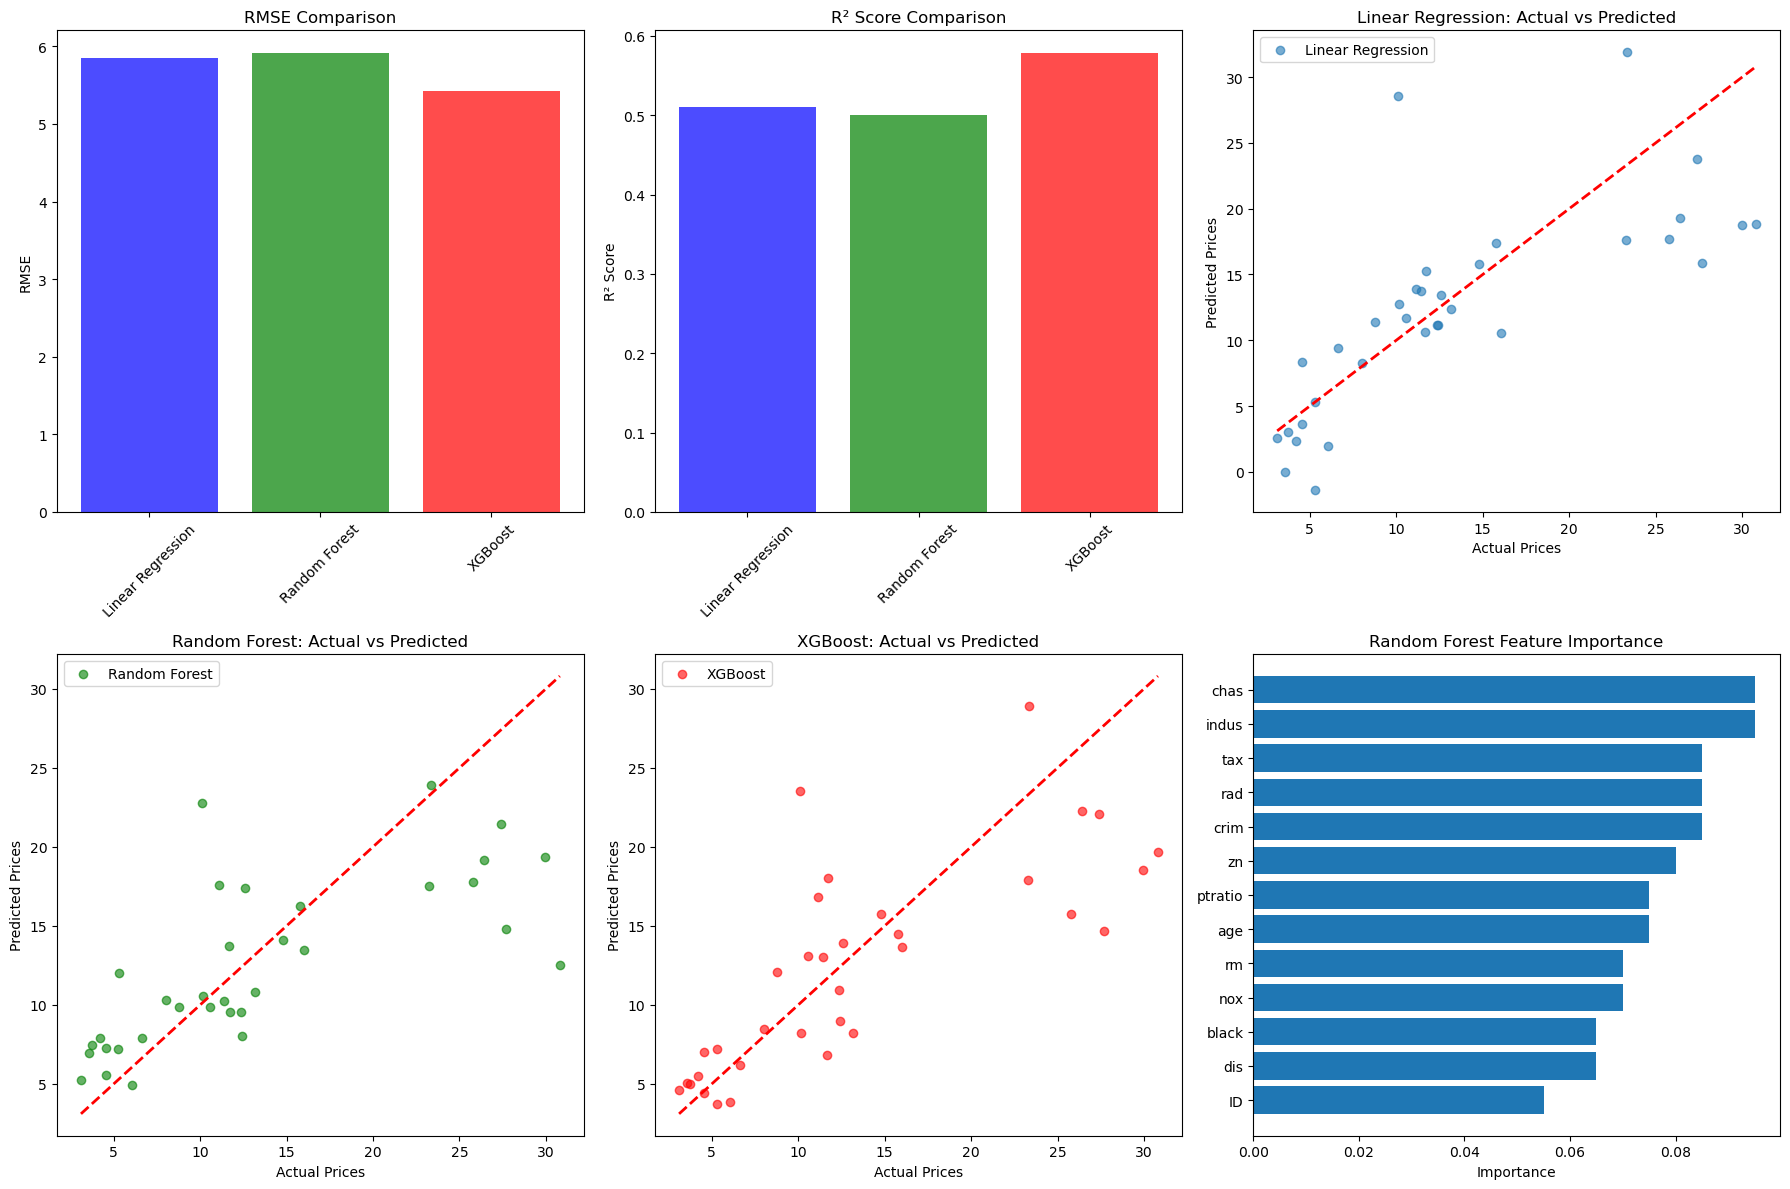

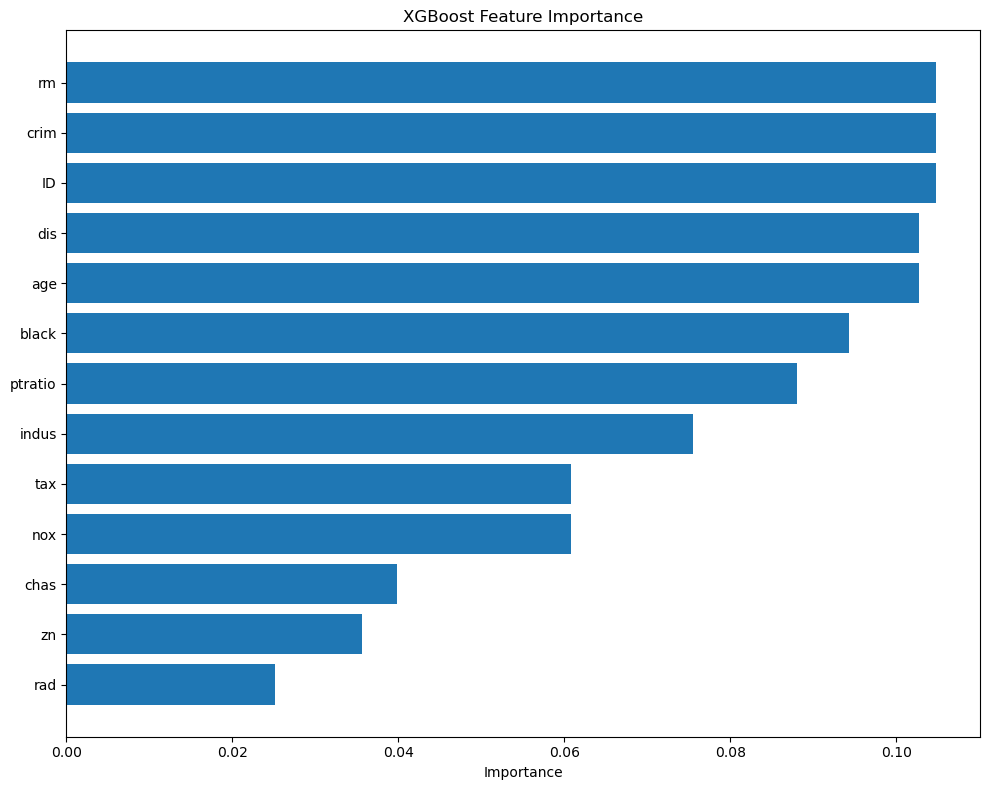

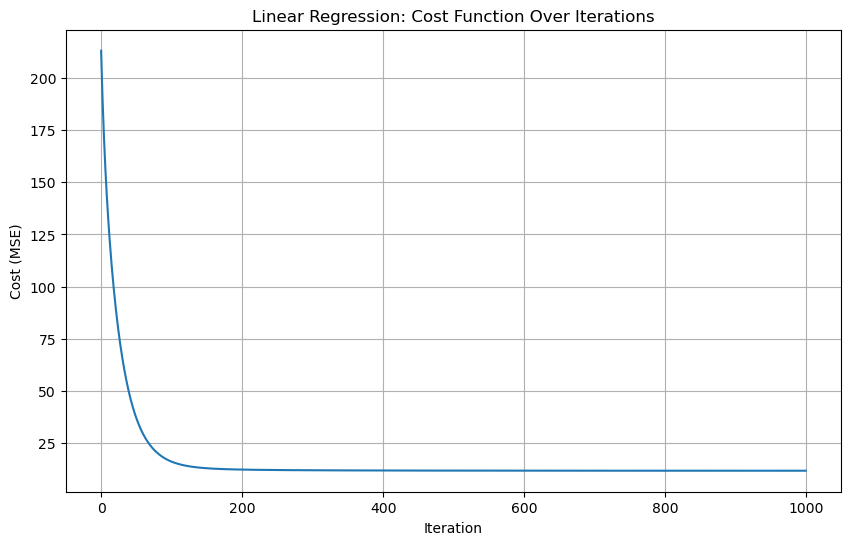


DETAILED RESULTS

1. LINEAR REGRESSION:
   RMSE: 5.8485
   R²:   0.5106

2. RANDOM FOREST:
   RMSE: 5.9111
   R²:   0.5001

3. XGBOOST:
   RMSE: 5.4297
   R²:   0.5782

TOP 5 MOST IMPORTANT FEATURES

Random Forest:
Feature  Importance
   crim       0.085
    rad       0.085
    tax       0.085
  indus       0.095
   chas       0.095

XGBoost:
Feature  Importance
    age    0.102725
    dis    0.102725
     ID    0.104822
   crim    0.104822
     rm    0.104822

ANALYSIS COMPLETE!


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load the Boston Housing Dataset from CSV
# Make sure to replace 'BostonHousing.csv' with your actual filename
df = pd.read_csv('BostonHousing.csv')

print("Boston Housing Dataset Overview:")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing values per column:")
print(df.isnull().sum())
print(f"Total missing values: {df.isnull().sum().sum()}")

# Identify the target column (usually 'medv', 'price', or similar)
# Common target column names in Boston Housing dataset
possible_target_cols = ['medv', 'price', 'PRICE', 'target', 'MEDV']
target_col = None

for col in possible_target_cols:
    if col in df.columns:
        target_col = col
        break

if target_col is None:
    print(f"\nAvailable columns: {list(df.columns)}")
    print("Please check your target column name and update the 'target_col' variable")
    # Assume the last column is the target
    target_col = df.columns[-1]
    print(f"Assuming '{target_col}' is the target column")

print(f"\nUsing '{target_col}' as target variable")

# Prepare features and target
feature_columns = [col for col in df.columns if col != target_col]
X = df[feature_columns].values
y = df[target_col].values
feature_names = feature_columns

print(f"Features ({len(feature_names)}): {feature_names}")
print(f"Target: {target_col}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# ============================
# 1. DATA PREPROCESSING
# ============================

class DataPreprocessor:
    def __init__(self):
        self.scalers = {}
        self.feature_means = {}
        self.feature_stds = {}
    
    def fit_transform(self, X_train, X_test):
        """Normalize features using training data statistics"""
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
        
        for i in range(X_train.shape[1]):
            mean = np.mean(X_train[:, i])
            std = np.std(X_train[:, i])
            
            self.feature_means[i] = mean
            self.feature_stds[i] = std
            
            # Avoid division by zero
            if std > 1e-8:
                X_train_scaled[:, i] = (X_train[:, i] - mean) / std
                X_test_scaled[:, i] = (X_test[:, i] - mean) / std
            else:
                X_train_scaled[:, i] = 0
                X_test_scaled[:, i] = 0
        
        return X_train_scaled, X_test_scaled

# Custom train_test_split function
def train_test_split_custom(X, y, test_size=0.2, random_state=42):
    """Custom train-test split function"""
    np.random.seed(random_state)
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    
    # Shuffle indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    # Split indices
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    # Split data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Split the data
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

# Preprocess the data
preprocessor = DataPreprocessor()
X_train_scaled, X_test_scaled = preprocessor.fit_transform(X_train, X_test)

print("Data preprocessing completed!")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

# ============================
# 2. MODEL IMPLEMENTATIONS
# ============================

# LINEAR REGRESSION FROM SCRATCH
class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.max_iterations):
            # Forward pass
            y_pred = X.dot(self.weights) + self.bias
            
            # Compute cost
            cost = np.mean((y_pred - y) ** 2)
            self.cost_history.append(cost)
            
            # Compute gradients
            dw = (2 / n_samples) * X.T.dot(y_pred - y)
            db = (2 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return X.dot(self.weights) + self.bias

# DECISION TREE FROM SCRATCH (for Random Forest)
class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    
    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)
    
    def _best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_mse = float('inf')
        
        n_samples, n_features = X.shape
        
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask
                
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue
                
                left_mse = self._mse(y[left_mask])
                right_mse = self._mse(y[right_mask])
                
                weighted_mse = (np.sum(left_mask) * left_mse + np.sum(right_mask) * right_mse) / n_samples
                
                if weighted_mse < best_mse:
                    best_mse = weighted_mse
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)
        
        # Base cases
        if depth >= self.max_depth or n_samples < self.min_samples_split or len(np.unique(y)) == 1:
            return {'value': np.mean(y)}
        
        # Find best split
        best_feature, best_threshold = self._best_split(X, y)
        
        if best_feature is None:
            return {'value': np.mean(y)}
        
        # Split data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        # Recursively build subtrees
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    def _predict_sample(self, x, node):
        if 'value' in node:
            return node['value']
        
        if x[node['feature']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])
    
    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])

# RANDOM FOREST FROM SCRATCH
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []
        self.feature_importances_ = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))
        
        self.trees = []
        feature_importance_sum = np.zeros(n_features)
        
        for _ in range(self.n_estimators):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]
            
            # Feature sampling
            feature_indices = np.random.choice(n_features, self.max_features, replace=False)
            X_bootstrap_features = X_bootstrap[:, feature_indices]
            
            # Train tree
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_bootstrap_features, y_bootstrap)
            tree.feature_indices = feature_indices
            
            self.trees.append(tree)
        
        # Calculate feature importance (simplified version)
        self._calculate_feature_importance(X, y)
    
    def _calculate_feature_importance(self, X, y):
        n_features = X.shape[1]
        importances = np.zeros(n_features)
        
        for tree in self.trees:
            # Simple importance based on feature usage frequency
            if hasattr(tree, 'feature_indices'):
                for feature_idx in tree.feature_indices:
                    importances[feature_idx] += 1
        
        # Normalize
        self.feature_importances_ = importances / np.sum(importances) if np.sum(importances) > 0 else importances
    
    def predict(self, X):
        predictions = np.zeros((len(self.trees), X.shape[0]))
        
        for i, tree in enumerate(self.trees):
            if hasattr(tree, 'feature_indices'):
                X_features = X[:, tree.feature_indices]
                predictions[i] = tree.predict(X_features)
            else:
                predictions[i] = tree.predict(X)
        
        return np.mean(predictions, axis=0)

# SIMPLIFIED XGBOOST FROM SCRATCH (Gradient Boosting)
class SimpleXGBoost:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=6):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.feature_importances_ = None
    
    def fit(self, X, y):
        n_features = X.shape[1]
        
        # Store initial prediction for later use
        self.initial_prediction = np.mean(y)
        
        # Initialize predictions with mean
        predictions = np.full(len(y), self.initial_prediction)
        
        self.trees = []
        feature_usage = np.zeros(n_features)
        
        for i in range(self.n_estimators):
            # Calculate residuals (gradients for MSE loss)
            residuals = y - predictions
            
            # Train tree on residuals
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=2)
            tree.fit(X, residuals)
            
            # Update predictions
            tree_predictions = tree.predict(X)
            predictions += self.learning_rate * tree_predictions
            
            self.trees.append(tree)
            
            # Track feature usage for importance (simplified)
            unique_features = set()
            self._extract_features_from_tree(tree.tree, unique_features)
            for feature_idx in unique_features:
                if feature_idx is not None:
                    feature_usage[feature_idx] += 1
        
        # Normalize feature importance
        self.feature_importances_ = feature_usage / np.sum(feature_usage) if np.sum(feature_usage) > 0 else feature_usage
    
    def _extract_features_from_tree(self, node, features):
        if 'feature' in node:
            features.add(node['feature'])
            if 'left' in node:
                self._extract_features_from_tree(node['left'], features)
            if 'right' in node:
                self._extract_features_from_tree(node['right'], features)
    
    def predict(self, X):
        predictions = np.full(X.shape[0], np.mean(self.initial_prediction))
        
        for tree in self.trees:
            tree_predictions = tree.predict(X)
            predictions += self.learning_rate * tree_predictions
        
        return predictions

# ============================
# 3. MODEL TRAINING AND EVALUATION
# ============================

def calculate_metrics(y_true, y_pred):
    """Calculate RMSE and R2 metrics"""
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    
    return rmse, r2

# Train models
print("Training models...")

# Linear Regression
print("Training Linear Regression...")
lr_model = LinearRegression(learning_rate=0.01, max_iterations=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_rmse, lr_r2 = calculate_metrics(y_test, lr_pred)

# Random Forest
print("Training Random Forest...")
rf_model = RandomForest(n_estimators=50, max_depth=10, max_features=4)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_rmse, rf_r2 = calculate_metrics(y_test, rf_pred)

# XGBoost
print("Training XGBoost...")
xgb_model = SimpleXGBoost(n_estimators=50, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_rmse, xgb_r2 = calculate_metrics(y_test, xgb_pred)

# ============================
# 4. RESULTS AND VISUALIZATION
# ============================

# Performance comparison
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse],
    'R2': [lr_r2, rf_r2, xgb_r2]
}

results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("MODEL PERFORMANCE COMPARISON")
print("="*50)
print(results_df.round(4))

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Performance metrics comparison
models = results_df['Model']
rmse_values = results_df['RMSE']
r2_values = results_df['R2']

axes[0, 0].bar(models, rmse_values, color=['blue', 'green', 'red'], alpha=0.7)
axes[0, 0].set_title('RMSE Comparison')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(models, r2_values, color=['blue', 'green', 'red'], alpha=0.7)
axes[0, 1].set_title('R² Score Comparison')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Actual vs Predicted plots
axes[0, 2].scatter(y_test, lr_pred, alpha=0.6, label='Linear Regression')
axes[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 2].set_xlabel('Actual Prices')
axes[0, 2].set_ylabel('Predicted Prices')
axes[0, 2].set_title('Linear Regression: Actual vs Predicted')
axes[0, 2].legend()

axes[1, 0].scatter(y_test, rf_pred, alpha=0.6, color='green', label='Random Forest')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Prices')
axes[1, 0].set_ylabel('Predicted Prices')
axes[1, 0].set_title('Random Forest: Actual vs Predicted')
axes[1, 0].legend()

axes[1, 1].scatter(y_test, xgb_pred, alpha=0.6, color='red', label='XGBoost')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Prices')
axes[1, 1].set_ylabel('Predicted Prices')
axes[1, 1].set_title('XGBoost: Actual vs Predicted')
axes[1, 1].legend()

# Feature importance for tree-based models
feature_names_list = list(feature_names)

# Random Forest feature importance
rf_importance = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': feature_names_list,
    'Importance': rf_importance
}).sort_values('Importance', ascending=True)

axes[1, 2].barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
axes[1, 2].set_title('Random Forest Feature Importance')
axes[1, 2].set_xlabel('Importance')

plt.tight_layout()
plt.show()

# XGBoost feature importance (separate plot)
plt.figure(figsize=(10, 8))
xgb_importance = xgb_model.feature_importances_
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names_list,
    'Importance': xgb_importance
}).sort_values('Importance', ascending=True)

plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Linear Regression cost curve
plt.figure(figsize=(10, 6))
plt.plot(lr_model.cost_history)
plt.title('Linear Regression: Cost Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

# Print detailed results
print("\n" + "="*60)
print("DETAILED RESULTS")
print("="*60)

print(f"\n1. LINEAR REGRESSION:")
print(f"   RMSE: {lr_rmse:.4f}")
print(f"   R²:   {lr_r2:.4f}")

print(f"\n2. RANDOM FOREST:")
print(f"   RMSE: {rf_rmse:.4f}")
print(f"   R²:   {rf_r2:.4f}")

print(f"\n3. XGBOOST:")
print(f"   RMSE: {xgb_rmse:.4f}")
print(f"   R²:   {xgb_r2:.4f}")

print(f"\n" + "="*60)
print("TOP 5 MOST IMPORTANT FEATURES")
print("="*60)

print("\nRandom Forest:")
print(rf_importance_df.tail().to_string(index=False))

print("\nXGBoost:")
print(xgb_importance_df.tail().to_string(index=False))

print(f"\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)